# Data Cleaning Part A


### Findings
- After variable-specific null entries are replaced with `NaN`, there were 181 variables with over 50% missing data. These variables were dropped.
- Out of the eight continuous variables (including `WEIGHT`), only 3 were actually found to be continuous. This was discovered by plotting histogram distributions of the continuous variables.
- The 3 continuous variables are not correlated to the target `outcome`, so they were also dropped, making the dataset entirely categorical.
- The partially preprocessed dataset `MASTEROUTCOME_2.csv` was saved to the local directory.

### Tasks
- Clean the rest of the categorical variables using variable-specific random sample imputation.
- Check for collinearity between variables using ~~Spearman's Rank correlation~~. The unbiased Cramer's V is better than Spearman's for categorical variables.
- Check for correlation with target `outcome` as well, keeping in mind statistical significance.
- Explore top 20 highly correlated variables.
- Also explore 20 variables that could cause Alzheimer's according to the literature and experts, and check for consistency with what was found from this dataset.


**Ismail Dawoodjee 1:50 AM 15-Oct-2020**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Exploring severity of missing data without accounting for variable-specific encodings

Firstly, let's see how many null entries there are when only `-4` entries are taken to be null. 

In [70]:
df = pd.read_csv('MASTEROUTCOME.csv', na_values=[-4])

In [53]:
df.head()

,SEX,RACE,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,NACCFAM,NACCAM,NACCFM,...,NACCEPMD,NACCHTNC,NACCLIPL,NACCNSD,NACCPDMD,NACCVASD,NACCBMI,NACCUDSD,NACCDIED,outcome
0,1.0,1.0,18.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,32.4,1.0,0.0,1.0
1,2.0,1.0,16.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0
2,1.0,1.0,16.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,1.0,1.0
3,1.0,1.0,16.0,1.0,2.0,1.0,1.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,25.4,1.0,0.0,1.0
4,1.0,1.0,12.0,2.0,3.0,2.0,1.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,30.4,4.0,1.0,1.0


Four variables need to be dropped. These are `['NACCID', 'CVDIMAGX', 'NACCTMCI', 'IMPNOMCI']`.

In [71]:
df.drop(['NACCID', 'CVDIMAGX', 'NACCTMCI', 'IMPNOMCI'], axis=1, inplace=True)

Seven variables are numerical/continuous. In addition, `WEIGHT` should be included into this, making a total of eight:

`['HEIGHT', 'WEIGHT', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'NACCBMI']`

The rest are integer encoded categorical variables.

In [72]:
miss_perc = pd.DataFrame(round(df.isnull().sum()*100/len(df), 4), columns=['percentage_null'])
miss_perc.head()

,percentage_null
SEX,0.0
RACE,0.0
EDUC,0.0
MARISTAT,0.0
NACCLIVS,0.0


In [26]:
miss_perc.sort_values(by='percentage_null', ascending=False).head(5)

,percentage_null
LOGIPREV,99.4269
FTLDSUBT,88.2013
CRAFTDTI,85.1347
CRAFTCUE,85.1347
UDSBENRS,85.1196


Columns with over 50% null entries should be dropped.

In [73]:
miss_perc[miss_perc['percentage_null'] >= 50].count()

percentage_null    178
dtype: int64

In [74]:
miss_perc[miss_perc['percentage_null'] >= 20].count()

percentage_null    182
dtype: int64

There are 178 variables with missing entries over 50% and 182 varibles with over 20%. 

### Exploring severity of missing data after accounting for variable-specific encodings


Now, let's see how many there are when variable-specific missing entries are included.

In [106]:
df = pd.read_csv('MASTEROUTCOME.csv')
df.drop(['NACCID', 'CVDIMAGX', 'NACCTMCI', 'IMPNOMCI'], axis=1, inplace=True)

In [107]:
miss = [[None],[None],[50, 99],[99],[9],[9],[9],[9, -4],[9, -4],[9, -4],
        [None],[None],[-4],[9,-4],[9,-4],[88,99,-4],[888,999,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [88.8,-4],[888,-4],[888,-4],[888,-4],[888,-4],[9,-4],[9,-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[8,-4],[8,-4],[8,-4],[8,-4],[None],[None],
        [None],[None],[None],[None],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[88,-4],[9,-4],
        [9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],[9,-4],
        [8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],
        [8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],
        [8,-4],[4,99],[888,999],[-4],[9],[9],[9],[9],[9],[9],[9],[9],[9],
        [9,-4],[9,-4],[10,99],[4,99],[888,999,-4],[-4],[9],[9],[9],[9],
        [99],[4,99],[9,-4],[999,-4],[9,-4],[-4],[-4],[9],[9],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[9,-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[99,-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[None],
        [None],[-4],[-4],[None],[-4],[-4],[None],[None],[-4],[None],[None],
        [None],[None],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],
        [8,-4],[8,-4],[8,-4],[-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],[8,-4],
        [8,-4],[9,-4],[8],[-4],[-4],[-4],[-4],[-4],[None],[None],[-4],[-4],
        [None],[None],[None],[None],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[9,-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[None],[-4],[None],[-4],[None],[-4],[None],[-4],
        [-4],[None],[-4],[-4],[-4],[None],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[None],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[None],[None],[None],[None],[-4],[-4],[-4],[None],[-4],[None],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [99],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],
        [-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[-4],[888.8,-4],[None],
        [None],[None]]

In [108]:
len(miss)

398

For each missing value placeholder list `m` and its corresponding variable `v`, if the variable entries are in the placeholder list, replace the placeholder (e.g. 888.8) with a `NaN`.

In [109]:
for (m, v) in zip(miss, df.columns.to_list()):
    
    df.loc[df[v].isin(m), v] = float(np.nan)

In [110]:
miss_perc = pd.DataFrame(df.isnull().sum()*100/len(df), columns=['percentage_null'])
miss_perc[miss_perc['percentage_null'] >= 50].count()

percentage_null    181
dtype: int64

In [85]:
miss_perc[miss_perc['percentage_null'] >= 20].count()

percentage_null    185
dtype: int64

There are 181 variables with over 50% missing entries and 185 variables with over 20% missing entries when variable-specific encoded missing entries are accounted for. This took quite a lot of time to carry out but did not yield much difference. Drop the variables with over 50% missing entries.

In [111]:
df.drop(miss_perc[miss_perc['percentage_null'] >= 50].index, axis=1, inplace=True)

### Checking for collinearity between continuous variables

Some variables are nominal categorical while others are ordinal categorical, and seven of them are continuous. Explore the histogram distribution of **continuous** variables:

In [128]:
continuous = ['HEIGHT', 'WEIGHT', 'NACCBMI', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB']

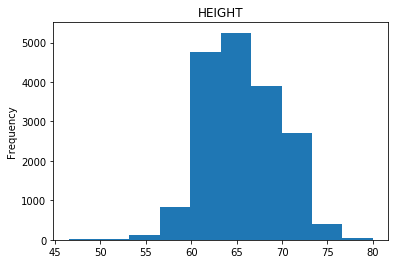

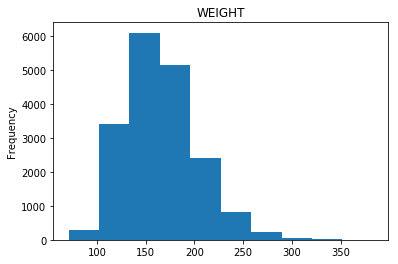

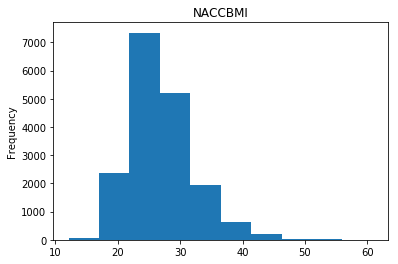

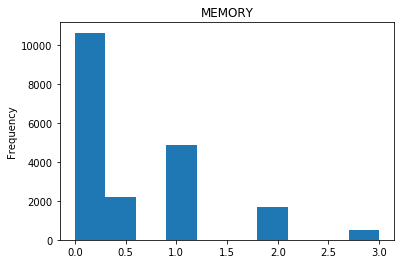

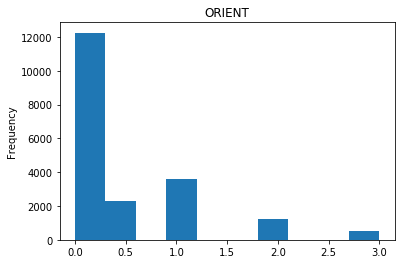

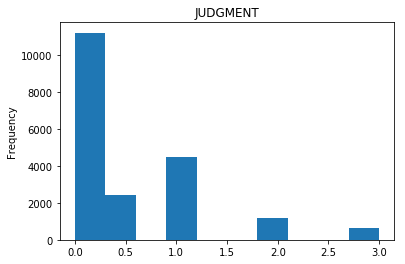

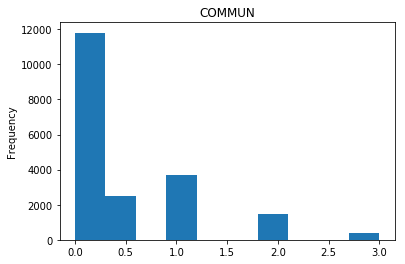

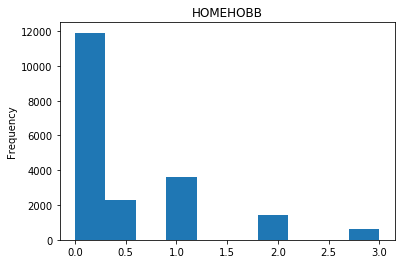

In [39]:
for col in continuous:    
    f, ax = plt.subplots()
    df[col].plot(kind='hist')
    plt.title(col)

In [130]:
for col in continuous[3:]:
    print(df[col].nunique())

5
5
5
5
5


**It appears that only `HEIGHT`, `WEIGHT` and `NACCBMI` are continuous, while the others are categorical (only 5 categories).** Python's `.dtypes` can be misleading in this case if visual exploration is not done. Investigate the correlation between the three continuous variables, along with the target `outcome` variable. The Pearson correlation was used here:

In [114]:
continuous = ['HEIGHT', 'WEIGHT', 'NACCBMI', 'outcome']
cont_corr = df[continuous].corr(method='pearson')
cont_corr

,HEIGHT,WEIGHT,NACCBMI,outcome
HEIGHT,1.000000,0.537367,-0.020087,-0.022158
WEIGHT,0.537367,1.000000,0.826045,-0.005921
NACCBMI,-0.020087,0.826045,1.000000,0.006499
outcome,-0.022158,-0.005921,0.006499,1.000000


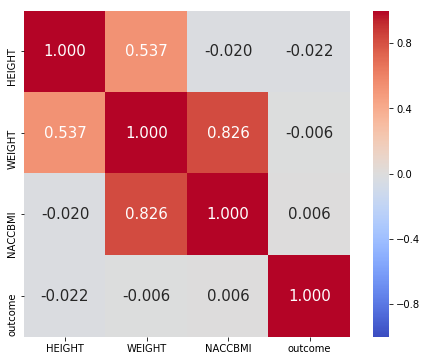

In [92]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cont_corr, square=True, cmap='coolwarm', vmin=-1,
            annot=True, fmt='.3f', annot_kws={'size': 15});

The three continuous variables are not correlated to the target, so they can be dropped. This makes all the variables in the dataset categorical. Save the partially cleaned dataset to local directory.

In [118]:
df.drop(['HEIGHT', 'WEIGHT', 'NACCBMI'], axis=1, inplace=True)

In [121]:
df.to_csv('MASTEROUTCOME_2.csv', index=False)